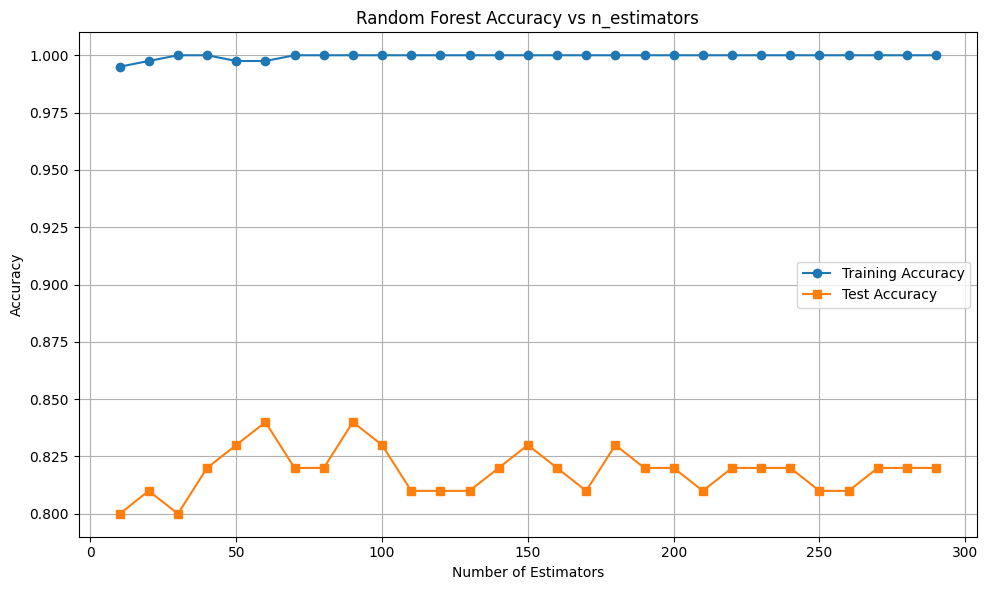

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('student_performance_dataset.csv')

# Step 1: Preprocess the data
# Remove duplicates
data = data.drop_duplicates(subset='Student_ID')

# Drop irrelevant columns
data = data.drop(columns=['Student_ID', 'Final_Exam_Score'])

# Encode binary columns (Gender, Internet_Access_at_Home, Extracurricular_Activities)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Internet_Access_at_Home'] = data['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})

# One-hot encode Parental_Education_Level
data = pd.get_dummies(data, columns=['Parental_Education_Level'])

# Separate features (X) and target (y)
X = data.drop(columns=['Pass_Fail'])
y = data['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Try different n_estimators
n_estimators_range = range(10, 300, 10)  # 10 to 300 in steps of 10
train_accuracies = []
test_accuracies = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))


# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='s')
plt.title('Random Forest Accuracy vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
X_train

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Internet_Access_at_Home,Extracurricular_Activities,Parental_Education_Level_Bachelors,Parental_Education_Level_High School,Parental_Education_Level_Masters,Parental_Education_Level_PhD
294,0,33,95.775684,89,1,0,False,False,True,False
582,0,12,93.175907,66,0,0,False,False,False,True
19,1,39,85.197307,62,1,0,False,False,False,True
402,0,25,95.028615,65,1,1,False,False,True,False
417,1,28,58.336538,51,0,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
113,0,33,91.339941,53,0,0,False,False,False,True
323,1,39,76.829532,62,1,1,False,False,True,False
442,1,31,74.908259,89,1,0,False,False,False,True
588,0,38,55.145802,97,1,1,False,True,False,False
